### KernelPCA
```
FileName: KernelPCA-v1.ipynb
Description: Use sklearn KernelPCA for dimentionality reduction
Inputs: All 577 features file
Outputs: Reduced features file
Version Info:
    v1: 9-Jul-2018: Initial Version
```

In [24]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
import pandas as pd
import numpy as np
import datetime

In [25]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-10 15:12:33


In [26]:
# Setup parameters
fileNameNoPrefix = "Librosa10SecCSVExtract2Test"
n_features = 8 # Note: Program errors out if you try to use more than 8

In [27]:
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [28]:
x_data_df = df.drop('label',axis=1)

In [29]:
y_data = (df["label"]).as_matrix(columns=None)
type(y_data)

numpy.ndarray

In [30]:
y_data

array([0., 0., 0., ..., 1., 1., 1.])

In [31]:
x_data_df.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575',
       'f576'],
      dtype='object', length=577)

In [32]:
x_data_df.shape

(1724, 577)

In [33]:
x_data_np = (x_data_df.as_matrix(columns=None))
type(x_data_np)
x_data = x_data_np[:,:]
x_data.shape

(1724, 577)

In [34]:
features = StandardScaler().fit_transform(x_data)

In [35]:
# Apply kernal PCA with radius basis function (RBF) kernel 
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=n_features) 
features_kpca = kpca.fit_transform(features)

In [36]:
print("Original number of features:",features.shape[1])
print("Reduced number of features:", features_kpca.shape[1])

Original number of features: 577
Reduced number of features: 8


In [39]:
features_kpca.shape

(1724, 8)

In [40]:
# Unlike PCA, KPCA does not give us back top features
headerList = ["ff" + str(i) for i in range(n_features)]
headerList.append("label")
headerList

['ff0', 'ff1', 'ff2', 'ff3', 'ff4', 'ff5', 'ff6', 'ff7', 'label']

In [41]:
# Add label column to features_kpca
newDF = pd.DataFrame(features_kpca, columns=None)
newDF["label"] = y_data
newDF.shape

(1724, 9)

In [19]:
newDF.to_csv(path_or_buf=(fileNameNoPrefix + "_ReducedKPCA" + str(n_features) + ".gzip"), sep=",", index=False, 
             header=headerList, compression='gzip')

In [20]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-10 13:06:28


In [21]:
from matplotlib import pyplot as plt

def plot_step_lda(newX_data, newY_data):

    label_dict = {0: 'Sad', 1: 'Happy'}

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=newX_data[:,0].real[newY_data == label],
                y=newX_data[:,1].real[newY_data == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


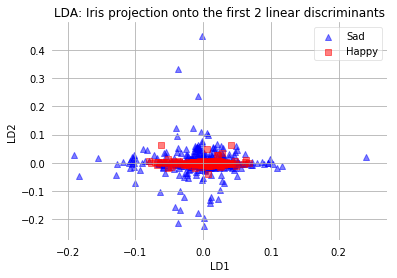

In [22]:
newX_dataDF = newDF.drop("label", axis=1)
newY_data = newDF["label"].values
plot_step_lda(newX_dataDF.as_matrix(columns=None), newY_data)